In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Final EDA & Cleaning

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_pm25_hourly = pd.read_csv("/content/drive/MyDrive/BMKG/1. Kualitas Udara & AWS/dataset/KU/csv/pm25_jogja_clean_2024.csv")
df_aws_hourly = pd.read_csv("/content/drive/MyDrive/BMKG/1. Kualitas Udara & AWS/dataset/AWS/csv/aws_jogja_hourly_clean.csv")

In [4]:
df_pm25_hourly.head()

,Tanggal,pm25
0,2024-01-01 07:00:00,35.2
1,2024-01-01 08:00:00,9.1
2,2024-01-01 09:00:00,18.5
3,2024-01-01 10:00:00,17.5
4,2024-01-01 11:00:00,23.0


In [5]:
df_aws_hourly.head()

,Unnamed: 0,rr,ws_avg,ws_max,wd_avg,wd_sin,wd_cos,tt_air_max,tt_air_avg,tt_air_min,rh_avg,sr_avg,pp_air
0,2024-01-01 07:00:00,20.4,0.796000,2.627331,250.771311,-0.568235,-0.198199,28.08,26.676667,25.25,89.321305,327.266667,990.462217
1,2024-01-01 08:00:00,0.0,0.654500,2.234687,213.220428,-0.322189,-0.491973,29.22,28.550000,27.80,80.528333,491.183333,991.110700
2,2024-01-01 09:00:00,0.0,0.835833,3.352323,218.088163,-0.605159,-0.772117,30.50,29.661667,28.91,75.260000,674.400000,991.152733
3,2024-01-01 10:00:00,0.0,1.110833,3.481706,223.482799,-0.619864,-0.653593,31.48,30.720000,30.18,70.248333,759.833333,990.364683
4,2024-01-01 11:00:00,0.0,1.436833,4.099219,226.547640,-0.641812,-0.608043,32.49,31.780000,31.19,64.065000,865.383333,989.523517


In [6]:
# Merge
df_final = pd.merge(df_pm25_hourly, df_aws_hourly, left_index=True, right_index=True, how='inner')

In [7]:
df_final.head(3)

,Tanggal,pm25,Unnamed: 0,rr,ws_avg,ws_max,wd_avg,wd_sin,wd_cos,tt_air_max,tt_air_avg,tt_air_min,rh_avg,sr_avg,pp_air
0,2024-01-01 07:00:00,35.2,2024-01-01 07:00:00,20.4,0.796000,2.627331,250.771311,-0.568235,-0.198199,28.08,26.676667,25.25,89.321305,327.266667,990.462217
1,2024-01-01 08:00:00,9.1,2024-01-01 08:00:00,0.0,0.654500,2.234687,213.220428,-0.322189,-0.491973,29.22,28.550000,27.80,80.528333,491.183333,991.110700
2,2024-01-01 09:00:00,18.5,2024-01-01 09:00:00,0.0,0.835833,3.352323,218.088163,-0.605159,-0.772117,30.50,29.661667,28.91,75.260000,674.400000,991.152733


In [8]:
# # Ambil salah satu tanggal (misal yang X), jadikan datetime
# df_final['Tanggal'] = pd.to_datetime(df_final['Tanggal_x'])

# # Set sebagai Index utama
# df_final.set_index('Tanggal', inplace=True)

# buang kolom sampah (Tanggal_x dan Tanggal_y)
# df_final.drop(columns=['Tanggal_x', 'Tanggal_y'], inplace=True)
df_final.drop(columns=['Unnamed: 0'], inplace=True)


# Cek hasil
print(df_final.head())

               Tanggal  pm25    rr    ws_avg    ws_max      wd_avg    wd_sin  \
0  2024-01-01 07:00:00  35.2  20.4  0.796000  2.627331  250.771311 -0.568235   
1  2024-01-01 08:00:00   9.1   0.0  0.654500  2.234687  213.220428 -0.322189   
2  2024-01-01 09:00:00  18.5   0.0  0.835833  3.352323  218.088163 -0.605159   
3  2024-01-01 10:00:00  17.5   0.0  1.110833  3.481706  223.482799 -0.619864   
4  2024-01-01 11:00:00  23.0   0.0  1.436833  4.099219  226.547640 -0.641812   

     wd_cos  tt_air_max  tt_air_avg  tt_air_min     rh_avg      sr_avg  \
0 -0.198199       28.08   26.676667       25.25  89.321305  327.266667   
1 -0.491973       29.22   28.550000       27.80  80.528333  491.183333   
2 -0.772117       30.50   29.661667       28.91  75.260000  674.400000   
3 -0.653593       31.48   30.720000       30.18  70.248333  759.833333   
4 -0.608043       32.49   31.780000       31.19  64.065000  865.383333   

       pp_air  
0  990.462217  
1  991.110700  
2  991.152733  
3  990.364

In [9]:
print(f"Total baris data: {len(df_final)}")

Total baris data: 8003


## FINAL CLEANING PM2.5 (LONJAKAN TIDAK WAJAR)

In [10]:
df_final['pm25_diff'] = df_final['pm25'].diff().abs()

threshold_jump = 80
suspicious_jumps = df_final[df_final['pm25_diff'] > threshold_jump]

if len(suspicious_jumps) > 0:
    print(f"Ditemukan {len(suspicious_jumps)} lonjakan ekstrem (> {threshold_jump} ug/m3 dalam 1 jam).")

    # Tandai lonjakan ekstrem menjadi NaN
    mask_jump = df_final['pm25_diff'] > threshold_jump
    df_final.loc[mask_jump, 'pm25'] = np.nan

    # HITUNG JUMLAH KOSONG SEBELUM INTERPOLASI
    jumlah_nan = df_final['pm25'].isna().sum()
    print(f"   -> Total data PM2.5 yang kosong (siap diinterpolate): {jumlah_nan}")

    # Proses Interpolasi
    df_final['pm25'] = df_final['pm25'].interpolate(method='linear')
    print("   -> Lonjakan ekstrem telah dihaluskan (interpolasi).")
else:
    print("Tidak ada lonjakan PM2.5 yang tidak masuk akal (Data Smooth).")

# Hapus kolom bantuan
df_final.drop(columns=['pm25_diff'], inplace=True, errors='ignore')


Ditemukan 5 lonjakan ekstrem (> 80 ug/m3 dalam 1 jam).
   -> Total data PM2.5 yang kosong (siap diinterpolate): 5
   -> Lonjakan ekstrem telah dihaluskan (interpolasi).


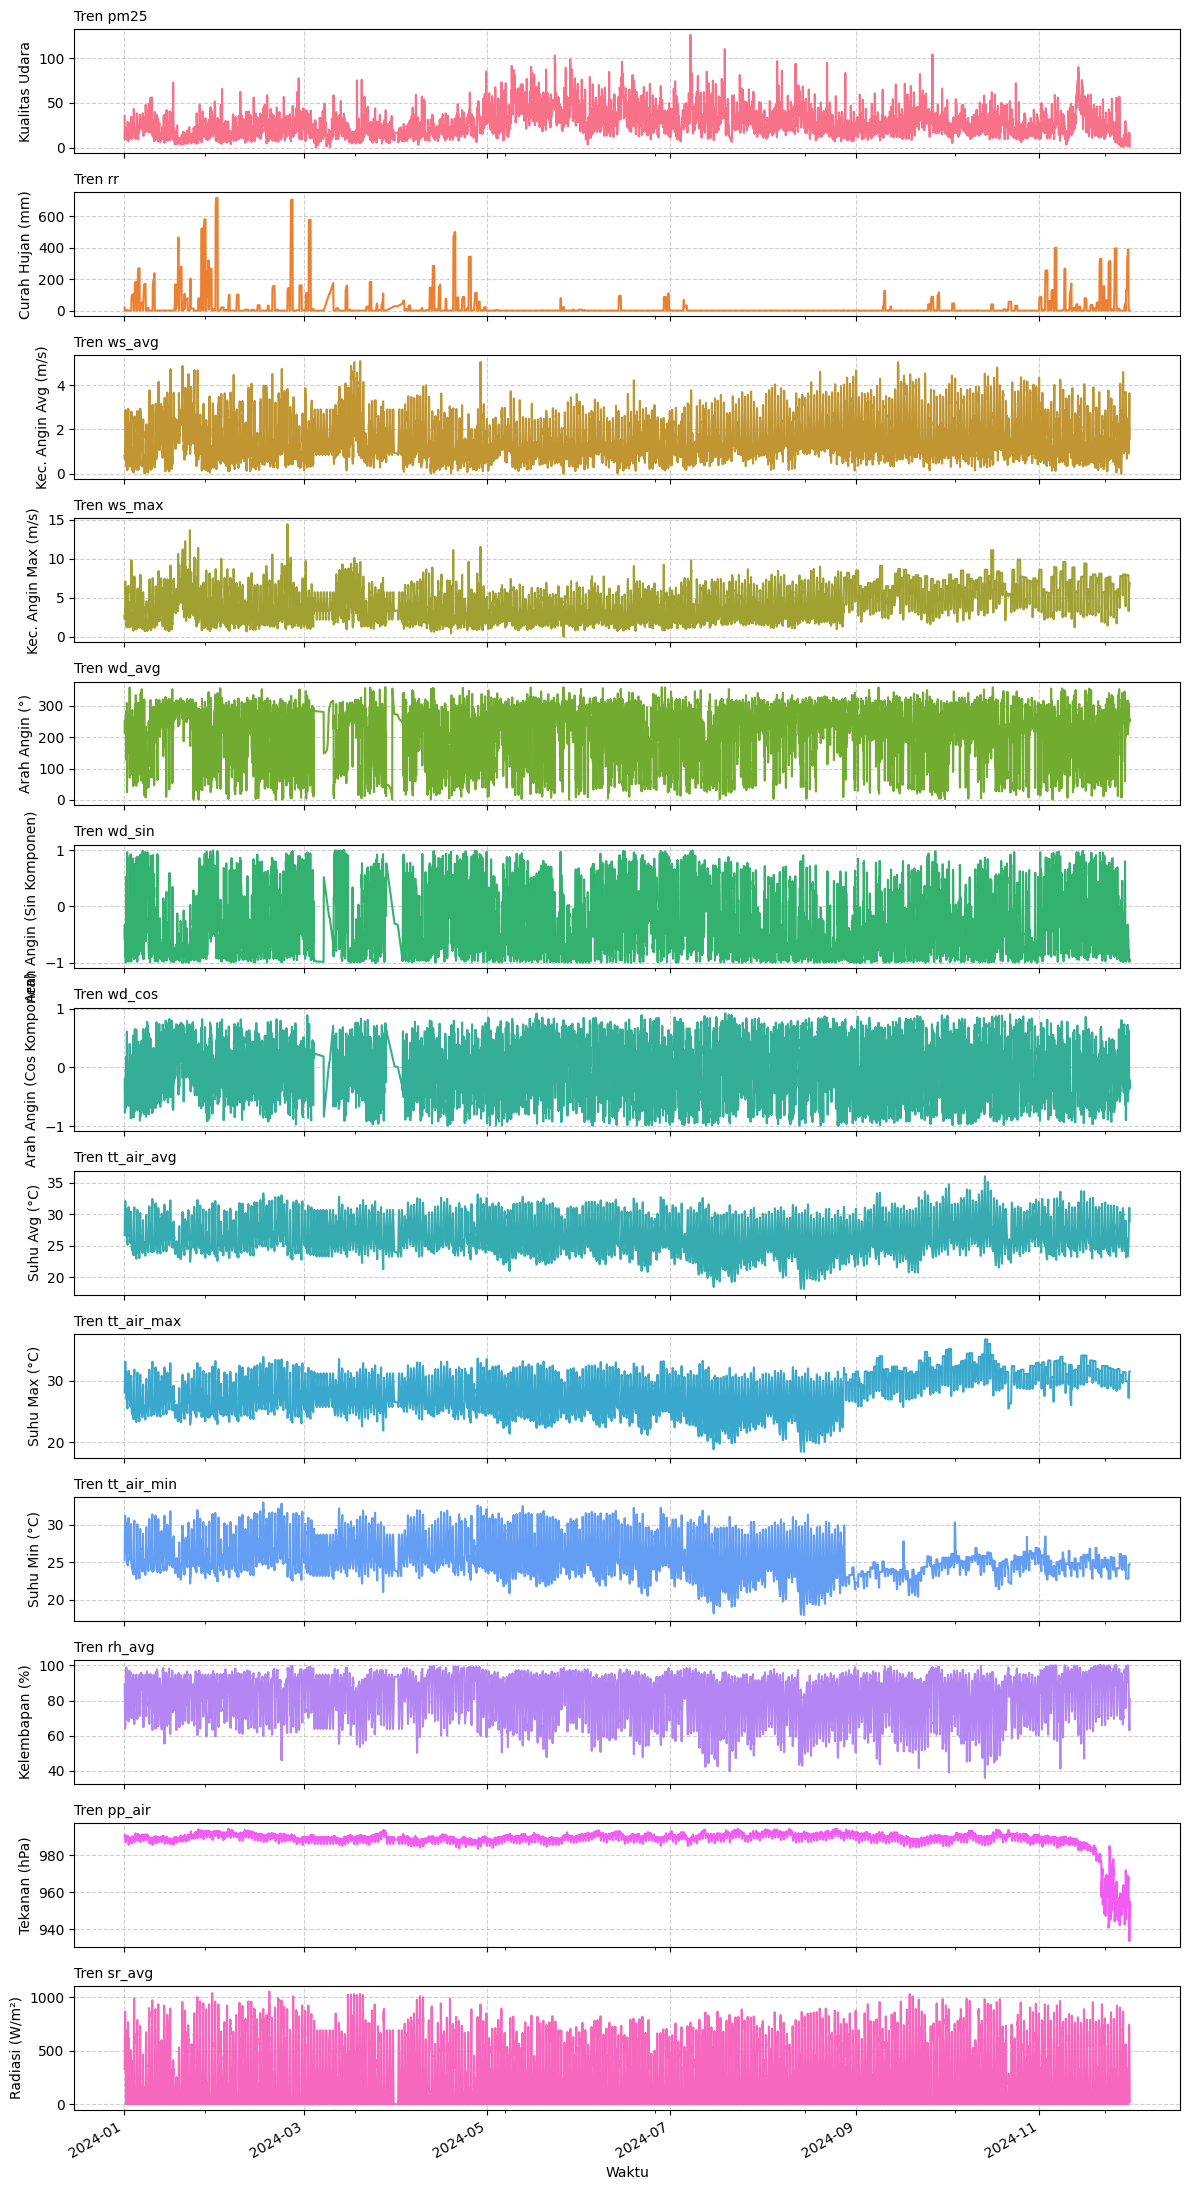

In [31]:
import matplotlib.pyplot as plt

# Daftar kolom yang ingin diplot dari df_final
cols = ['pm25', 'rr', 'ws_avg', 'ws_max', 'wd_avg', 'wd_sin', 'wd_cos',
        'tt_air_avg', 'tt_air_max', 'tt_air_min',
        'rh_avg', 'pp_air', 'sr_avg']

# Label satuan untuk masing-masing kolom agar lebih jelas di plot
labels = ['Kualitas Udara', 'Curah Hujan (mm)', 'Kec. Angin Avg (m/s)', 'Kec. Angin Max (m/s)',
          'Arah Angin (°)', 'Arah Angin (Sin Komponen)', 'Arah Angin (Cos Komponen)',
          'Suhu Avg (°C)', 'Suhu Max (°C)', 'Suhu Min (°C)',
          'Kelembapan (%)', 'Tekanan (hPa)', 'Radiasi (W/m²)']

# colors = ['gray', 'blue', 'orange', 'darkorange', 'red',
#           'darkred', 'green', 'darkblue', 'teal', 'purple', 'brown']

colors = sns.color_palette("husl", len(cols))

# Membuat kanvas besar dengan jumlah baris sesuai jumlah kolom, tingginya 22 inci
fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(12, 22), sharex=True)

for i, col in enumerate(cols):
    if col in df_final.columns:
        # Plot data pada axis yang spesifik
        df_final[col].plot(ax=axes[i], color=colors[i], legend=False)

        # Memberikan label y dan judul kecil di tiap subplot
        axes[i].set_ylabel(labels[i])
        axes[i].set_title(f'Tren {col}', loc='left', fontsize=10)
        axes[i].grid(True, linestyle='--', alpha=0.6)
    else:
        axes[i].text(0.5, 0.5, f'Kolom {col} tidak ditemukan', ha='center', va='center')

# Label sumbu x hanya di paling bawah karena sharex=True
plt.xlabel('Waktu')
plt.tight_layout() # Agar antar plot tidak tumpang tindih
plt.show()

In [14]:
df_final.isnull().sum()

,0
Tanggal,0
pm25,0
rr,0
ws_avg,0
ws_max,0
wd_avg,0
wd_sin,0
wd_cos,0
tt_air_max,0
tt_air_avg,0


## EDA  KORELASI

In [15]:
df_final.set_index('Tanggal', inplace=True)

In [16]:
# Hitung korelasi antar variabel
plt.figure(figsize=(12, 10))
correlation = df_final.corr()

# Fokus lihat korelasi terhadap target (pm25)
print("\n📊 Top Korelasi terhadap PM2.5:")
print(correlation['pm25'].sort_values(ascending=False))


📊 Top Korelasi terhadap PM2.5:
pm25          1.000000
pp_air        0.096262
wd_sin        0.058015
tt_air_min    0.003208
sr_avg       -0.003404
wd_cos       -0.017280
tt_air_avg   -0.020377
wd_avg       -0.021797
rh_avg       -0.024717
tt_air_max   -0.050491
rr           -0.116439
ws_max       -0.146870
ws_avg       -0.147552
Name: pm25, dtype: float64


<Figure size 1200x1000 with 0 Axes>

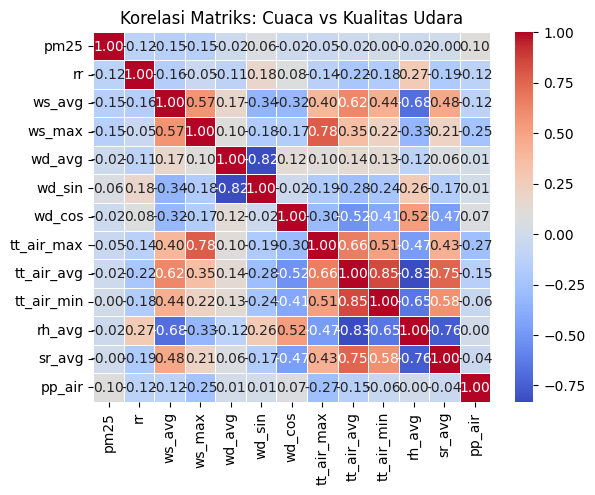

In [17]:
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasi Matriks: Cuaca vs Kualitas Udara')
plt.show()

In [18]:
df_final.head()

,pm25,rr,ws_avg,ws_max,wd_avg,wd_sin,wd_cos,tt_air_max,tt_air_avg,tt_air_min,rh_avg,sr_avg,pp_air
Tanggal,,,,,,,,,,,,,
2024-01-01 07:00:00,35.2,20.4,0.796000,2.627331,250.771311,-0.568235,-0.198199,28.08,26.676667,25.25,89.321305,327.266667,990.462217
2024-01-01 08:00:00,9.1,0.0,0.654500,2.234687,213.220428,-0.322189,-0.491973,29.22,28.550000,27.80,80.528333,491.183333,991.110700
2024-01-01 09:00:00,18.5,0.0,0.835833,3.352323,218.088163,-0.605159,-0.772117,30.50,29.661667,28.91,75.260000,674.400000,991.152733
2024-01-01 10:00:00,17.5,0.0,1.110833,3.481706,223.482799,-0.619864,-0.653593,31.48,30.720000,30.18,70.248333,759.833333,990.364683
2024-01-01 11:00:00,23.0,0.0,1.436833,4.099219,226.547640,-0.641812,-0.608043,32.49,31.780000,31.19,64.065000,865.383333,989.523517


In [19]:
df_final.index = pd.to_datetime(df_final.index)
print(df_final.index)

DatetimeIndex(['2024-01-01 07:00:00', '2024-01-01 08:00:00',
               '2024-01-01 09:00:00', '2024-01-01 10:00:00',
               '2024-01-01 11:00:00', '2024-01-01 12:00:00',
               '2024-01-01 13:00:00', '2024-01-01 14:00:00',
               '2024-01-01 15:00:00', '2024-01-01 16:00:00',
               ...
               '2024-11-30 21:00:00', '2024-11-30 22:00:00',
               '2024-11-30 23:00:00', '2024-12-01 00:00:00',
               '2024-12-01 01:00:00', '2024-12-01 02:00:00',
               '2024-12-01 03:00:00', '2024-12-01 04:00:00',
               '2024-12-01 05:00:00', '2024-12-01 06:00:00'],
              dtype='datetime64[ns]', name='Tanggal', length=8003, freq=None)


In [20]:
import numpy as np
import pandas as pd

print("Feature Engineering & Final Setup...")

# 1. TAMBAHKAN FITUR WAKTU (Kode Kamu - Valid ✅)
# Pastikan index adalah datetime
df_final['hour'] = df_final.index.hour
df_final['month'] = df_final.index.month

# Transformasi Sin/Cos (Siklus 24 jam & 12 bulan)
df_final['hour_sin'] = np.sin(2 * np.pi * df_final['hour'] / 24)
df_final['hour_cos'] = np.cos(2 * np.pi * df_final['hour'] / 24)
df_final['month_sin'] = np.sin(2 * np.pi * df_final['month'] / 12)
df_final['month_cos'] = np.cos(2 * np.pi * df_final['month'] / 12)

# Hapus kolom bantuan (biar tidak double informasi)
df_final.drop(columns=['hour', 'month'], inplace=True)

print("   -> Fitur Cyclical (Waktu) berhasil ditambahkan.")

Feature Engineering & Final Setup...
   -> Fitur Cyclical (Waktu) berhasil ditambahkan.


In [21]:
df_final.head()

,pm25,rr,ws_avg,ws_max,wd_avg,wd_sin,wd_cos,tt_air_max,tt_air_avg,tt_air_min,rh_avg,sr_avg,pp_air,hour_sin,hour_cos,month_sin,month_cos
Tanggal,,,,,,,,,,,,,,,,,
2024-01-01 07:00:00,35.2,20.4,0.796000,2.627331,250.771311,-0.568235,-0.198199,28.08,26.676667,25.25,89.321305,327.266667,990.462217,0.965926,-0.258819,0.5,0.866025
2024-01-01 08:00:00,9.1,0.0,0.654500,2.234687,213.220428,-0.322189,-0.491973,29.22,28.550000,27.80,80.528333,491.183333,991.110700,0.866025,-0.500000,0.5,0.866025
2024-01-01 09:00:00,18.5,0.0,0.835833,3.352323,218.088163,-0.605159,-0.772117,30.50,29.661667,28.91,75.260000,674.400000,991.152733,0.707107,-0.707107,0.5,0.866025
2024-01-01 10:00:00,17.5,0.0,1.110833,3.481706,223.482799,-0.619864,-0.653593,31.48,30.720000,30.18,70.248333,759.833333,990.364683,0.500000,-0.866025,0.5,0.866025
2024-01-01 11:00:00,23.0,0.0,1.436833,4.099219,226.547640,-0.641812,-0.608043,32.49,31.780000,31.19,64.065000,865.383333,989.523517,0.258819,-0.965926,0.5,0.866025


In [26]:
# Hitung korelasi antar variabel
plt.figure(figsize=(20, 16))
correlation = df_final.corr()

# Fokus lihat korelasi terhadap target (pm25)
print("\n📊 Top Korelasi terhadap PM2.5:")
print(correlation['pm25'].sort_values(ascending=False))


📊 Top Korelasi terhadap PM2.5:
pm25          1.000000
pp_air        0.096262
hour_sin      0.087060
wd_sin        0.058015
hour_cos      0.043627
tt_air_min    0.003208
sr_avg       -0.003404
wd_cos       -0.017280
tt_air_avg   -0.020377
wd_avg       -0.021797
rh_avg       -0.024717
tt_air_max   -0.050491
month_sin    -0.115895
rr           -0.116439
ws_max       -0.146870
ws_avg       -0.147552
month_cos    -0.346238
Name: pm25, dtype: float64


<Figure size 2000x1600 with 0 Axes>

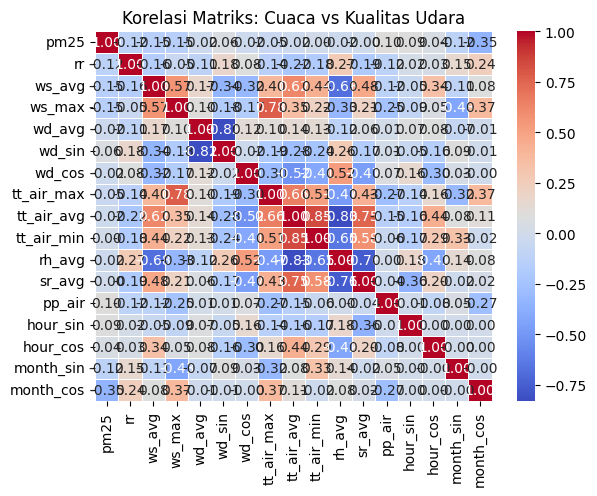

In [27]:
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasi Matriks: Cuaca vs Kualitas Udara')
plt.show()

In [28]:
df_final.to_csv('/content/drive/MyDrive/BMKG/1. Kualitas Udara & AWS/dataset/final_dataset.csv')

In [30]:
df_final.columns

Index(['pm25', 'rr', 'ws_avg', 'ws_max', 'wd_avg', 'wd_sin', 'wd_cos',
       'tt_air_max', 'tt_air_avg', 'tt_air_min', 'rh_avg', 'sr_avg', 'pp_air',
       'hour_sin', 'hour_cos', 'month_sin', 'month_cos'],
      dtype='object')

## Target & finalisasi fitur training dan target

In [ ]:
target_col = 'pm25'

# Fitur yang TIDAK BOLEH masuk training:
# - pm25 (Jelas, ini jawabannya)
# - wd_avg (Karena sudah ada wd_sin & wd_cos)
cols_excluded = [target_col, 'wd_avg']

# Buat X dengan membuang kolom-kolom terlarang itu
X = df_final.drop(columns=cols_excluded, errors='ignore')
y = df_final[target_col]

print("Setup Selesai!")
print(f"-> Fitur yang masuk model ({X.shape[1]} kolom):")
print(f"{list(X.columns)}")
print("\n-> Pastikan TIDAK ADA 'wd_avg', 'hour', 'month', atau 'pm25' di list atas.")

Setup Selesai!
-> Fitur yang masuk model (15 kolom):
['rr', 'ws_avg', 'ws_max', 'wd_sin', 'wd_cos', 'tt_air_max', 'tt_air_avg', 'tt_air_min', 'rh_avg', 'sr_avg', 'pp_air', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos']

-> Pastikan TIDAK ADA 'wd_avg', 'hour', 'month', atau 'pm25' di list atas.


In [ ]:
print(f"Jumlah Fitur (X): {X.shape[1]} kolom")
print(f"Daftar Fitur: {list(X.columns)}")
print(f"Total Data: {len(X)} baris")

Jumlah Fitur (X): 15 kolom
Daftar Fitur: ['rr', 'ws_avg', 'ws_max', 'wd_sin', 'wd_cos', 'tt_air_max', 'tt_air_avg', 'tt_air_min', 'rh_avg', 'sr_avg', 'pp_air', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos']
Total Data: 8003 baris


# TRAINING

## XGBoost

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
print("🛠️ Menambahkan Lag Features (Senjata Rahasia Time Series)...")

# Kita buat fitur: Polusi 1 jam lalu, 2 jam lalu, dan 3 jam lalu
# Shift(1) artinya geser data ke bawah 1 baris
df_final['pm25_lag1'] = df_final['pm25'].shift(1)
df_final['pm25_lag2'] = df_final['pm25'].shift(2)
df_final['pm25_lag3'] = df_final['pm25'].shift(3)

# Tambahan: Rata-rata polusi 6 jam terakhir (Rolling Mean)
df_final['pm25_roll_mean6'] = df_final['pm25'].rolling(window=6).mean().shift(1)

# PENTING: Karena digeser, baris-baris paling awal akan jadi NaN (kosong).
# Kita harus buang baris awal yg kosong itu.
df_final.dropna(inplace=True)

print("✅ Lag Features berhasil ditambahkan!")
print(df_final[['pm25', 'pm25_lag1', 'pm25_lag2']].head())

🛠️ Menambahkan Lag Features (Senjata Rahasia Time Series)...
✅ Lag Features berhasil ditambahkan!
                     pm25  pm25_lag1  pm25_lag2
Tanggal                                        
2024-01-01 13:00:00  22.3       15.6       23.0
2024-01-01 14:00:00  18.9       22.3       15.6
2024-01-01 15:00:00  13.1       18.9       22.3
2024-01-01 16:00:00   9.8       13.1       18.9
2024-01-01 17:00:00  14.0        9.8       13.1


In [ ]:
# print("🛠️ Menambahkan Fitur Tren (Rolling Statistics)...")

# # 1. Rolling Mean (Rata-rata bergerak)
# # Ini memberi tahu model: "Rata-rata polusi 3 jam terakhir berapa?"
# df_final['pm25_roll_mean_3h'] = df_final['pm25'].rolling(window=3).mean().shift(1)
# df_final['pm25_roll_mean_6h'] = df_final['pm25'].rolling(window=6).mean().shift(1)
# df_final['pm25_roll_mean_12h'] = df_final['pm25'].rolling(window=12).mean().shift(1) # Tren setengah hari

# # 2. Rolling Std (Standar Deviasi / Gejolak)
# # Ini memberi tahu model: "Apakah polusi stabil atau naik-turun drastis?"
# df_final['pm25_roll_std_6h'] = df_final['pm25'].rolling(window=6).std().shift(1)

# # 3. Differencing (Perubahan)
# # Ini memberi tahu model: "Sejam lalu naik berapa poin dibanding 2 jam lalu?"
# df_final['pm25_diff_1h'] = df_final['pm25_lag1'] - df_final['pm25_lag2']

# # Hapus NaN akibat rolling
# df_final.dropna(inplace=True)

# print("✅ Fitur Tren Berhasil Ditambahkan!")

🚀 Retraining XGBoost dengan Lag Features...

📊 HASIL SETELAH LAG FEATURES:
   -> R2 Score : 0.7105 (Target kita > 0.7)
   -> MAE      : 5.56


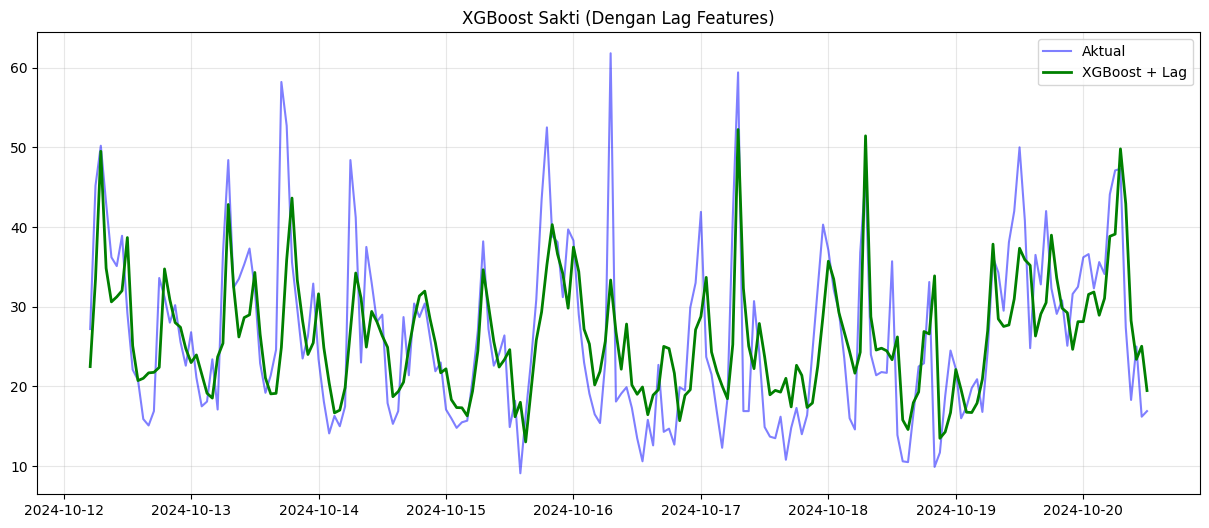

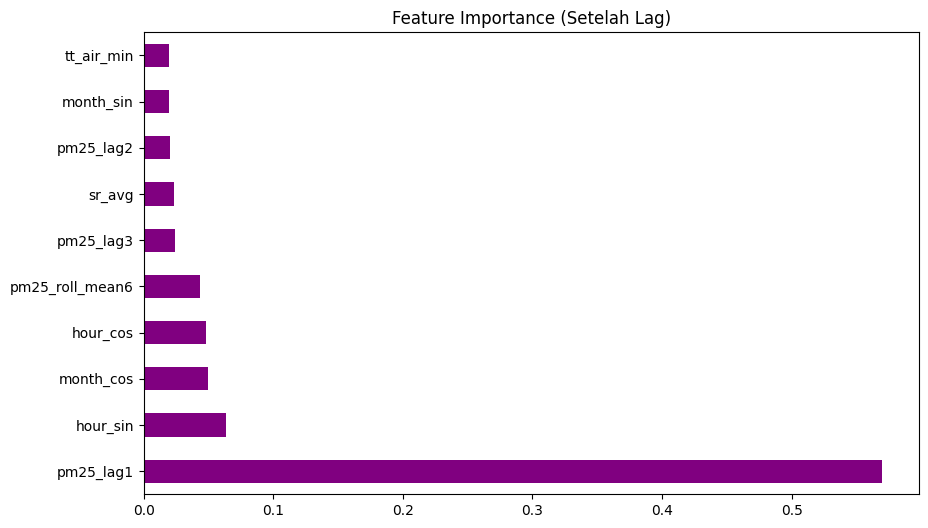

In [ ]:
print("🚀 Retraining XGBoost dengan Lag Features...")

# 1. DEFINISI ULANG X dan y (Karena df_final nambah kolom)
target_col = 'pm25'
cols_excluded = [target_col, 'wd_avg'] # wd_avg tetep dibuang
X = df_final.drop(columns=cols_excluded, errors='ignore')
y = df_final[target_col]

# 2. SPLIT ULANG
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)

# 3. SCALING ULANG
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. TRAINING LAGI
model_xgb = XGBRegressor(
    n_estimators=5000,
    learning_rate=0.05,
    max_depth=7,        # Kita perdalam dikit biar makin jago
    random_state=2004,
    early_stopping_rounds=50,
    n_jobs=-1
)

model_xgb.fit(
    X_train_scaled, y_train,
    eval_set=[(X_test_scaled, y_test)], # Eval pakai data test langsung
    verbose=False
)

# 5. EVALUASI BARU
y_pred_xgb = model_xgb.predict(X_test_scaled)
y_pred_xgb = np.maximum(y_pred_xgb, 0)

mae = mean_absolute_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

print("\n📊 HASIL SETELAH LAG FEATURES:")
print(f"   -> R2 Score : {r2:.4f} (Target kita > 0.7)")
print(f"   -> MAE      : {mae:.2f}")

# 6. PLOT HASIL
plt.figure(figsize=(15, 6))
limit = 200
plt.plot(y_test.index[:limit], y_test.iloc[:limit], label='Aktual', color='blue', alpha=0.5)
plt.plot(y_test.index[:limit], y_pred_xgb[:limit], label='XGBoost + Lag', color='green', linewidth=2)
plt.title('XGBoost Sakti (Dengan Lag Features)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Cek Feature Importance lagi (Pasti Lag1 jadi juara 1)
plt.figure(figsize=(10, 6))
pd.Series(model_xgb.feature_importances_, index=X.columns).nlargest(10).plot(kind='barh', color='purple')
plt.title('Feature Importance (Setelah Lag)')
plt.show()

In [ ]:
print("🚀 Training Model Final: Fokus UX (Hanya Lag-1)...")

# 1. BUANG LAG KEJAUHAN (Lag 2, Lag 3, Rolling Mean dibuang)
# Kita hanya sisakan 'pm25_lag1' sebagai satu-satunya info masa lalu.
# Fitur waktu (sin/cos) dan cuaca tetap dipakai karena itu otomatis/mudah inputnya.
cols_to_drop_for_ux = ['pm25_lag2', 'pm25_lag3', 'pm25_roll_mean6', 'pm25_roll_mean_3h',
                       'pm25_roll_mean_12h', 'pm25_roll_std_6h', 'pm25_diff_1h']

# Pastikan kita drop dari X (bukan df_final asli biar gak rusak)
# wd_avg dan pm25 (target) wajib dibuang juga dari X
features_to_drop = ['pm25', 'wd_avg'] + [c for c in cols_to_drop_for_ux if c in df_final.columns]

X_ux = df_final.drop(columns=features_to_drop, errors='ignore')
y_ux = df_final['pm25']

# 2. SPLIT & SCALE (Tetap 85:15)
X_train_ux, X_test_ux, y_train_ux, y_test_ux = train_test_split(X_ux, y_ux, test_size=0.15, shuffle=False)

scaler_ux = StandardScaler()
X_train_ux_scaled = scaler_ux.fit_transform(X_train_ux)
X_test_ux_scaled = scaler_ux.transform(X_test_ux)

# 3. TRAIN XGBOOST
model_ux = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=7,
    random_state=42,
    n_jobs=-1
)

model_ux.fit(X_train_ux_scaled, y_train_ux, verbose=False)

# 4. EVALUASI
y_pred_ux = model_ux.predict(X_test_ux_scaled)
y_pred_ux = np.maximum(y_pred_ux, 0)

r2_ux = r2_score(y_test_ux, y_pred_ux)
mae_ux = mean_absolute_error(y_test_ux, y_pred_ux)

print("\n📊 HASIL MODEL VERSI UX (Cuma butuh input 1 jam terakhir):")
print(f"   -> R2 Score : {r2_ux:.4f}")
print(f"   -> MAE      : {mae_ux:.2f}")

# Cek apakah masih di atas 0.7? Atau turun dikit ke 0.68?
# Kalau masih di atas 0.65, ini WORTH IT banget buat aplikasi!

🚀 Training Model Final: Fokus UX (Hanya Lag-1)...

📊 HASIL MODEL VERSI UX (Cuma butuh input 1 jam terakhir):
   -> R2 Score : 0.5754
   -> MAE      : 6.74
